# Body signal of smoking (12)
## analyzed by:
### Maram Abdalla
### Marleen Shakoor
### Ahmad Agbaria
### Moneer Barbor 

![download.jpg](https://ak5.picdn.net/shutterstock/videos/30602755/thumb/1.jpg)

## Data Source
https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking?resource=download

# Index:
---

1. [smoking by gender](#section1)
2. [age barplot](#section2)
3. [Diseases](#section3)
4. [weight comparsion](#section4)
5. [teeth and gums comparsion](#section5)
6.[hearin and sight comparsion](#section6)
7.[final conclousing](#section7)

# הסבר על הדאטה שלנו
### .בחרנו במערך נתונים בנושא עישון שכולל נתונים על אנשים שמעשנים ולא מעשנים ומיצג גם את הגיל המין ומחלות נפוצות   
### .המטרה שלנו לבדוק את השפעת העישון על המצב הבריאותי ולהבדיל בין גילאים שונים 

![download.gif](https://raw.githubusercontent.com/AhmadIgbaria/project2022/main/smoking.gif)

#  Import Methods 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# Loading dataset

In [2]:
url='https://raw.githubusercontent.com/AhmadIgbaria/project2022/main/smoking.csv'
smoking_df=pd.read_csv(url)
smoking_df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1,1,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1,1,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1,1,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1,1,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1,1,...,12.5,1,0.6,16,14,22,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1,1,...,12.3,1,0.6,14,7,10,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1,1,...,14.0,1,0.9,20,12,14,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1,1,...,12.4,1,0.5,17,11,12,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1,1,...,14.4,1,0.7,20,19,18,Y,0,N,0


## Missing Data

In [3]:
smoking_df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

## חילוק הנתונים לפי גיל ומין

In [4]:
data2 = smoking_df.copy()
data2=data2.replace({"age":{20:"20-45",25:"20-45",30:"20-45",35:"20-45",40:"20-45"}})
data2=data2.replace({"age":{45:"45-70",50:"45-70",55:"45-70",60:"45-70",65:"45-70",70:"45-70"}})
data2=data2.replace({"age":{75:"75-85",80:"75-85",85:"75-85"}})           
#data2=data2.replace({"smoking":{1:"smoking",0:"not smoking"}})  
data2=data2.replace({"gender":{'M':"Male",'F':"Female"}})
data2=data2.replace({"tartar":{"Y":1,"N":0}})

כדי לא לשנות את הדאטה המקורי (copy) קודם עבדנו על ההעתק של הדאטה
חילקנו את עמודת הגילאים לשלושה קטיגוריות כדי שנוכל לעשות השוואה בהתאם לגילאים בהמשך בצורה נוחה יותר
שינינו בעמודת עישות ומין את השמות גם כדי להציג באיורים בצורה ברורה יותר

In [5]:
smoking_men= data2.loc[(data2.smoking == "smoking") & (data2.gender == "M")]
nonsmoking_men= data2.loc[(data2.smoking == "not smoking") & (data2.gender == 'M')]
smoking_women= data2.loc[(data2.smoking == "smoking") & (data2.gender == 'F')]
nonsmoking_women= data2.loc[(data2.smoking == "not smoking") & (data2.gender == 'F')]
smoking=smoking_df.loc[(smoking_df.smoking == 1)]
nonsmoking=data2.loc[(data2.smoking == "not smoking")]
women=data2.loc[(data2.gender == 'F')]
men=data2.loc[(data2.gender == 'M')]

יצרנו דאטה חדש לכל קבוצה של מעשנים לא מעשנים גברים נשים , ישמשו אותנו בהמשך בהצגת הגרפים

![download.gif](https://raw.githubusercontent.com/AhmadIgbaria/project2022/main/giphy.webp)

# _________________________________________________________________________
#  1. smoking by gender
### באיור הזה הצגנו את אחוז המעשנים ולא מעשנים ואת אחוז הגברים והנשים באופן כללי בדאטה  
# _________________________________________________________________________

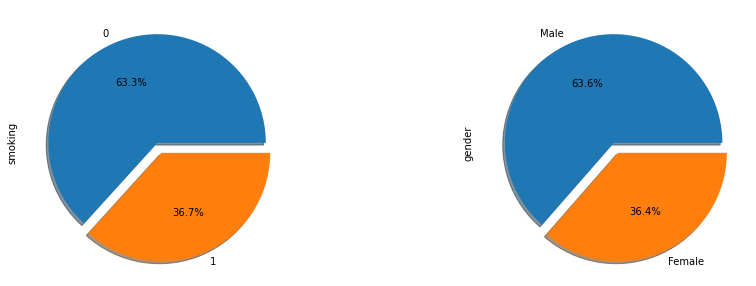

In [6]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
data2['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0],shadow=True)
data2['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[1],shadow=True);

##  השוואה בין המעשנים והמין

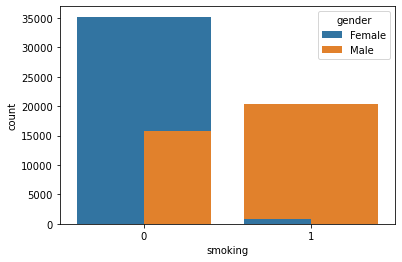

In [7]:
sns.countplot(data=data2,x="smoking")
sns.countplot(data=data2,x="smoking",hue="gender");

### הסקנו מזה שכמות המעשנים קטנה מכמות הלא מעשנים,
### וגם כן כמות הגברים שמעשנים גדולה יותר מכמות הנשים שמעשנות 

# _________________________________________________________________________
#  2. age barplot
### הצגת מספר המעשנים בכל גיל 
# _________________________________________________________________________

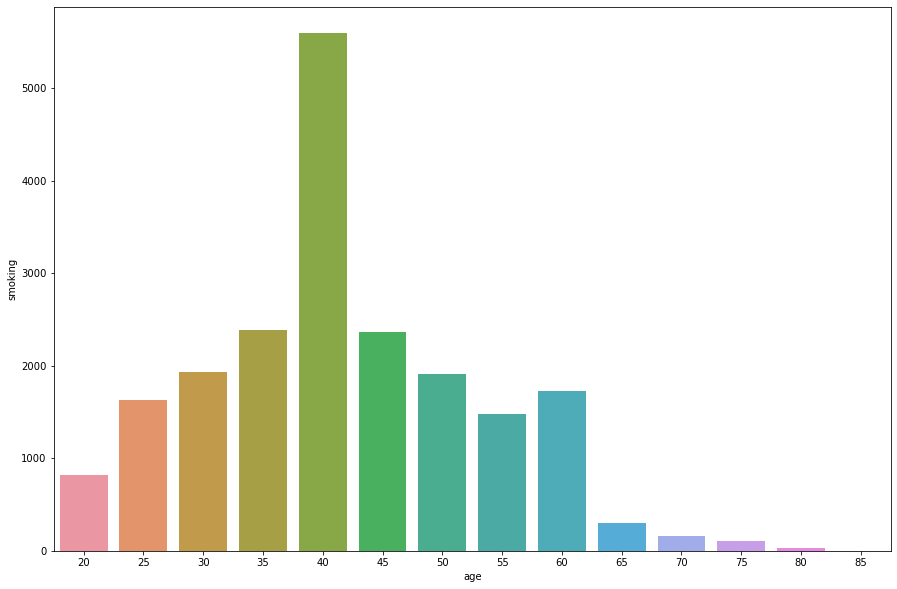

In [8]:
fig, axes = plt.subplots(figsize=(15, 10))
sns.barplot(x="age", y="smoking",  ci = None, estimator = sum, data=smoking);

## age gender Comparsion 
### הצגת מספר המעשנים לפי גיל ומין

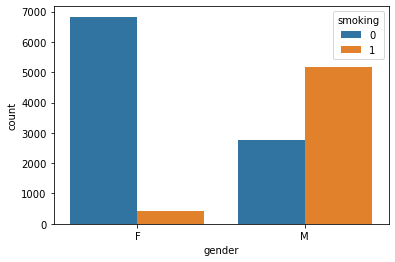

In [9]:
smoking40=smoking_df.loc[(smoking_df.age==40)]
sns.countplot(x='gender',hue='smoking', data=smoking40);

###  40  באיור הראשון הצגנו כמות של המעשנים(גברים ונשים) לפי גיל, 
### אפשר לראות שכמות המעשנים הכי גדולה היא בגיל
### לכן התיחסנו לגיל 40 והצגנו אותם בגרף נפרד

# _________________________________________________________________________
#  3. Diseases
### השפעת העישון על המחלות השונות 
# _________________________________________________________________________

In [10]:
data2.groupby(["smoking","gender"])[["fasting blood sugar",'Cholesterol','triglyceride','HDL', 'LDL','hemoglobin','Urine protein','serum creatinine',"AST","ALT","Gtp"]].mean()


fasting blood sugar  Cholesterol  triglyceride        HDL  \
smoking gender                                                              
0       Female            96.503551   201.075391    102.904333  63.228180   
        Male              99.223410   193.529769    125.238469  54.458083   
1       Female            99.189756   199.048894    124.339930  64.019790   
        Male             102.174679   195.387630    151.481272  53.391560   

                       LDL  hemoglobin  Urine protein  serum creatinine  \
smoking gender                                                            
0       Female  117.568547   13.158548       1.078633          0.737624   
        Male    114.906549   15.357804       1.087947          0.986258   
1       Female  110.358556   13.464377       1.080326          0.730384   
        Male    112.630894   15.532175       1.095428          0.958349   

                      AST        ALT        Gtp  
smoking gender                                   
0       Female  23.748250  20.172499  23.682637  
        Male    27.228219  30.357672  39.742107  
1       Female  23.455180  20.174622  35.697322  
        Male    27.873750  31.463870  56.441570

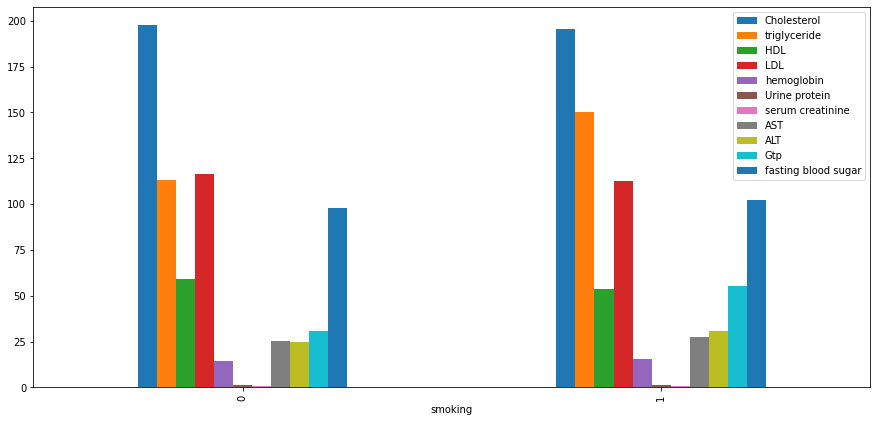

In [11]:
Diseases=['Cholesterol','triglyceride','HDL', 'LDL','hemoglobin','Urine protein','serum creatinine',"AST","ALT","Gtp","fasting blood sugar"]
data3=data2.groupby("smoking")[Diseases].mean()
data3.plot(kind="bar",figsize=(15,7));

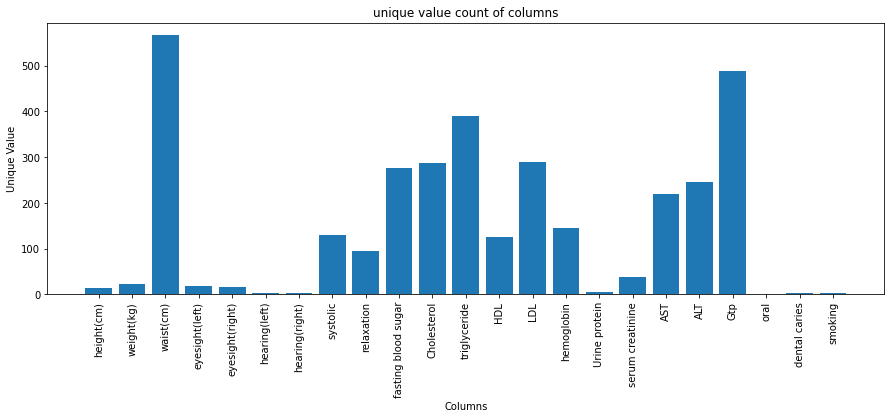

In [12]:
data21= data2.drop(columns=["ID","tartar","gender","age",])
fig = plt.figure(figsize = (15, 5))
plt.xlabel("Columns")
plt.xticks(rotation = 90)
plt.ylabel("Unique Value")
plt.title("unique value count of columns")
plt.bar(data21.columns,data21.nunique())
plt.show()

![download.jpg](https://raw.githubusercontent.com/AhmadIgbaria/project2022/main/1.jpg)


# 3.1

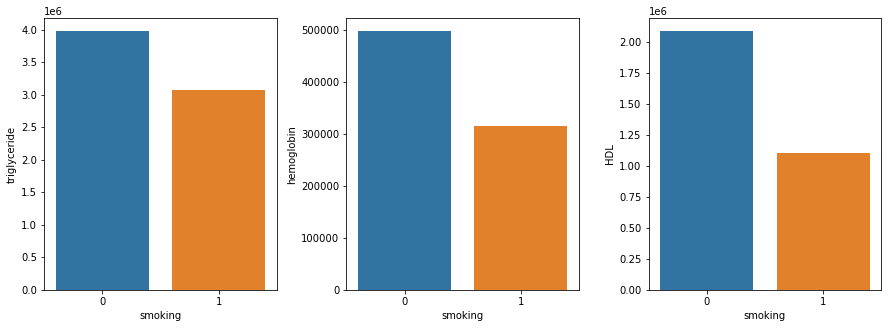

In [13]:
women=data2.loc[(data2.gender == 'F')]
men=data2.loc[(data2.gender == 'M')]
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)
plt.subplots_adjust(wspace = 0.3)
sns.barplot(x="smoking", y="triglyceride",  ci = None, estimator = sum, data=data2,ax=axes[0] )
sns.barplot(x="smoking", y='hemoglobin',   ci = None, estimator = sum, data=data2, ax = axes[1])
sns.barplot(x="smoking", y='HDL',   ci = None, estimator = sum, data=data2, ax = axes[2])
plt.show()


### קודם יצרנו טבלה שמציגה את כל המחלות לפי מין ואם מעשנים או לא והראנו את זה באיור

### מאיור זה אפשר להסיק כמה מסקנות
### כמות הסוכר אצל המעשנים(גברים ונשים) יותר גדולה וזה מגדיל את הסיכוי לחלות בסכרת   
### `Cholesterol` הוא כמות השומן בדם
###   ראינו שכמות השומן אצל מעשנים(גברים ונשים)  גדולה יותר 
### `triglyceride`:סוג של שומנים שמשמשת את הגוף  כמקור אנרגיה  
### ראינו שהכמות אצל מעשנים(גברים ונשים) יותר גדולה כמות גדולה עלולה לגרום להתקפי לב 
### `HDL:`  זה סוג  של כולסטרול טוב לגוף מפחית את הסיכוי למחלות לב 
### גדולה יותר HDL ומצאנו שאצל לא מעשנים כמות  
### `hemoglobin:`  מוביל את החמצן בדם
###  מצאנו שאצל הלא מעשנים כמות ההמוגלובין גדולה יותר וזה עדיף להקל בעיות נשימה והפחתת לחצי דם ..

#  3.2 הקשר בין הרוגע לעישון 

<AxesSubplot:xlabel='smoking', ylabel='relaxation'>

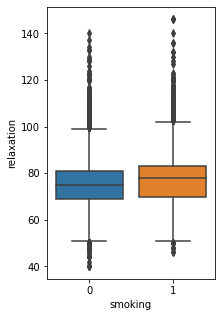

In [14]:

plt.figure(figsize=(3,5))
sns.boxplot(data = data2,x="smoking",y="relaxation")

###  מצאנו שהעישון משפיע על הרוגע זה מופיע בבוקס בלוט למרות שיש חריגים , עדיין אפשר לזהות שהממוצע אצל המעשנים גדול יותר

# _________________________________________________________________________
#  3.3.The relationship between diseases
### הקשר בין מחלות
# _________________________________________________________________________

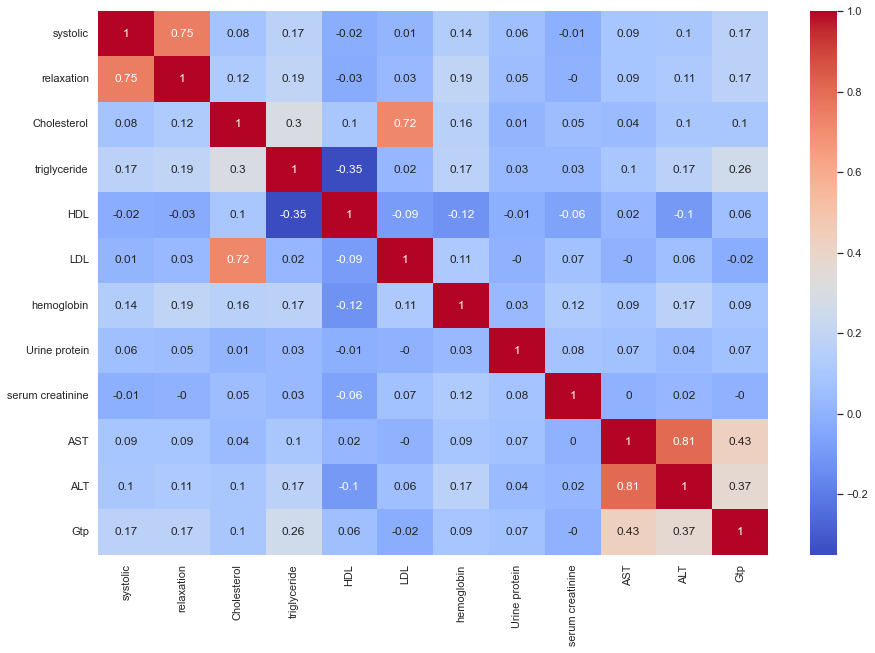

In [15]:
mahlot = ['systolic', 'relaxation','Cholesterol','triglyceride','HDL', 'LDL','hemoglobin','Urine protein','serum creatinine',"AST","ALT","Gtp"]
sns.set(rc = {'figure.figsize':(15,10)})
mahlot2 = smoking[mahlot].corr().round(2)
sns.heatmap(data=mahlot2 ,cmap='coolwarm', annot=True)
plt.show()

### הצגנו את הקשר בין כל המחלות כדי לבדוק אם יש מחלה מסויימת שמשפיעה על כל המחלות , ומזה אפשר להסיק שאם העישון משפיע על מחלה מסויימת אז הוא יגרום לעוד מחלות ומצאנו שהקשר הכי חזק הוא בין הכולסטרול ובין הכולסטרול הרע וביןAST , ALT  

# _________________________________________________________________________
#  3.4.The possibility of contracting a disease
### אפשרות לחלות במחלות 
# _________________________________________________________________________

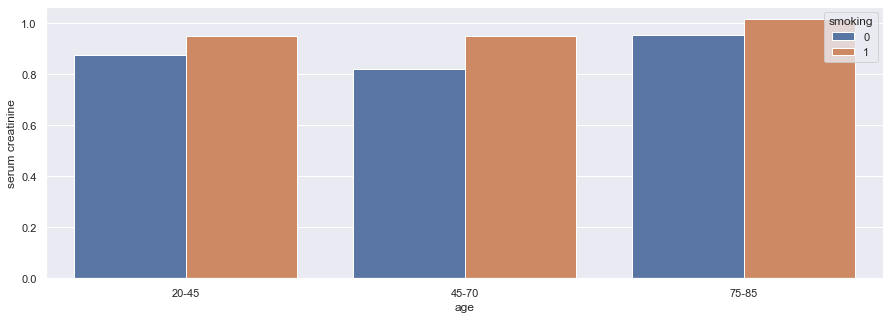

In [16]:
plt.figure(figsize=(15 ,5))

sns.barplot(x="age", y="serum creatinine", hue="smoking",  ci = None, data=data2)
plt.show()

### אפשר לראות אצל המעשנים אחוז הקיריאטינין גדול יותר מאלה הלא מעשנים , וככל שאחוז הקריאטינין גדול מהממוצע הסיכוי לחלות במחלות כלשהן גדול יותר 


![download.gif](https://raw.githubusercontent.com/AhmadIgbaria/project2022/main/he-infographic-2020.gif)

# _________________________________________________________________________
#  4.Weight Comparsion
### השפעת העישון על המשקל 
# _________________________________________________________________________

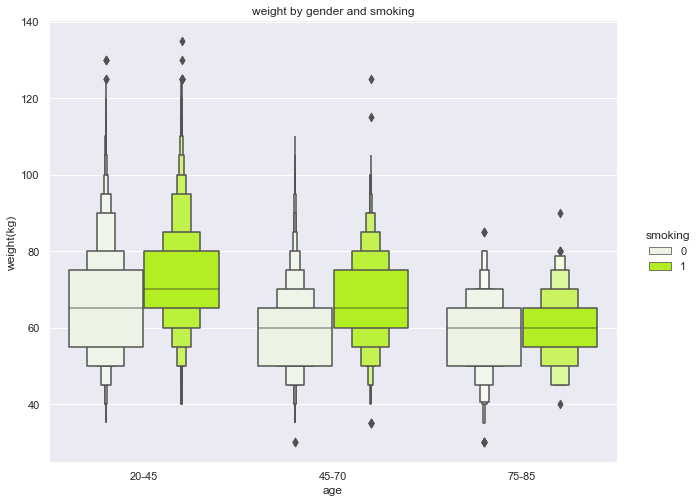

In [17]:
sns.catplot(x = "age",
            y = "weight(kg)",
            hue = "smoking",
            kind = "boxen",
            color = '#B3EE22',
            data = data2, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "weight by gender and smoking");

### יכולים להסיק מהגרף שאצל המעשנים המשקל הוא קטן יותר ביחס ללא מעשנים שהמשקל שלהם הוא גדול יותר

# _________________________________________________________________________
#  5.Teeth and Gums Comparsion
### השפעת העישון על שיניים וחניכיים 
# _________________________________________________________________________

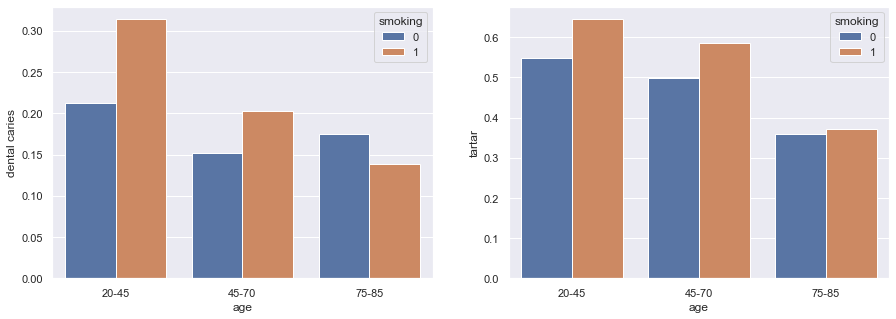

In [18]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.barplot(x="age", y="dental caries", hue="smoking",  ci = None, data=data2,ax=axes[0])
sns.barplot(x="age", y="tartar", hue="smoking",  ci = None, data=data2,ax=axes[1])
plt.show()

### יכולים להסיק מהגרף שהמעשנים סובלים מבעיות בשיניים יותר מהלא מעשנים 

# _________________________________________________________________________
#  6.The senses of hearing and sight comparsion
### חושי השמיעה והראייה 
# _________________________________________________________________________

In [19]:
data2.groupby(["smoking","gender"])[["hearing(left)","hearing(right)"]].mean()

hearing(left)  hearing(right)
smoking gender                               
0       Female       1.027789        1.028613
        Male         1.029105        1.028219
1       Female       1.022119        1.027939
        Male         1.020719        1.021943

In [20]:
eyes=data2.groupby(["smoking","gender"])[["eyesight(left)","eyesight(right)"]].mean()
eyes

eyesight(left)  eyesight(right)
smoking gender                                 
0       Female        0.932112         0.927609
        Male          1.060993         1.053578
1       Female        0.898254         0.907800
        Male          1.058461         1.053766

### יכולים לראות בטבלה שהעישון לא משפיע באופן משמעותי על השמיעה , אבל ההשפעה המשמעותית נראית יותר על הראייה  

# _________________________________________________________________________
# 7. final conclousing
### סיכום ומסקנות
# _________________________________________________________________________

### ...'אחרי סידור חילוק וניתוח עמוק של הדאטה הגענו לכל מיני מסקנות ותובנות שקשורות למחלות ובעיות בגוף וכו 
### הפרדנו בין גילאים שונים ובין המין מצאנו שיש הבדלים משמעותיים בהשפעת העישונין על כל גיל ומין
### מצאנו שהעישון משפיע בצורה משמעותית על מחלות רבות כגון: מחלות לב, סוכרת, רמת המוגלובין נמוכה, בעיות בפה ובשיניים ועל הראיה ושמיעה   
### בסופו של דבר אפשר לסיק שהנזקים מעישון רבים מכל הבחינות 


![download.jpg](https://raw.githubusercontent.com/AhmadIgbaria/project2022/main/img424200-9.jpg)